In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split



In [2]:
# read table

dataPayment = '../Datasets/Employee_Payroll.csv'
payroll = pd.read_csv(dataPayment)

# set default value to 0 for NaN numerical data
numeric_cols = payroll.select_dtypes(include=[np.number]).columns
payroll[numeric_cols] = payroll[numeric_cols].clip(lower=0)


payroll.fillna(0, inplace=True)
payroll['Office'] = payroll['Office'].astype(int)

# define column for 1/4 year discretization
payroll['Fiscal Quarter'] = payroll['Fiscal Quarter']*0.25 - 0.25
payroll['Fiscal Period'] = payroll['Fiscal Year'] + payroll['Fiscal Quarter']

pd.to_datetime(payroll['Original Hire Date'])

# parse hire date to get hire year
payroll['Original Hire Date'] = payroll['Original Hire Date'].str.split('/').str[2]
payroll['Original Hire Date'] = payroll['Original Hire Date'].astype(int)

_work_year = payroll["Fiscal Period"] - payroll['Original Hire Date']

In [3]:
# specify table column included

payroll = payroll[['Fiscal Year', 'Fiscal Period', 'Job Code', 'Job Title', 'Base Pay', 'Position ID', 'Employee Identifier']]

# add Working Year Column
payroll["Working Year"] = _work_year

payroll.head(20)

,Fiscal Year,Fiscal Period,Job Code,Job Title,Base Pay,Position ID,Employee Identifier,Working Year
0,2016,2016.00,1172,Assistant State's Attorney,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.00
1,2016,2016.25,1172,Assistant State's Attorney,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.25
2,2016,2016.50,1172,Assistant State's Attorney,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.50
3,2016,2016.75,1172,Assistant State's Attorney,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.75
4,2017,2017.00,1172,Assistant State's Attorney,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.00
5,2017,2017.25,1172,Assistant State's Attorney,24473.38,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.25
6,2017,2017.50,1172,Assistant State's Attorney,21217.35,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.50
7,2016,2016.00,5049,Residential Model Sr Anal III,17770.86,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.00
8,2016,2016.25,5049,Residential Model Sr Anal III,20800.67,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.25
9,2016,2016.50,5049,Residential Model Sr Anal III,17873.76,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.50


In [5]:
up = payroll.drop(['Job Title', 'Employee Identifier'], axis=1)
X = up[['Job Code', 'Working Year', 'Position ID', 'Fiscal Period', 'Fiscal Year']]
y = up['Base Pay']


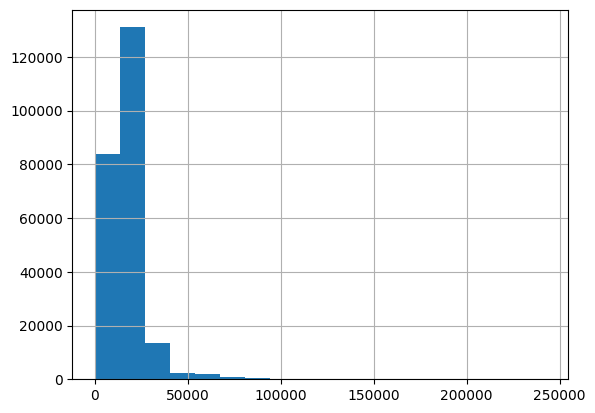

In [11]:
up['Base Pay'].hist(bins = 18)
plt.show()

In [13]:
correlation_matrix  = up.corr()
correlation_matrix['Base Pay']

Fiscal Year     -0.028771
Fiscal Period    0.009337
Job Code         0.083564
Base Pay         1.000000
Position ID      0.009383
Working Year     0.107878
Name: Base Pay, dtype: float64

In [24]:
X = up.drop("Base Pay", axis=1).values
y = up["Base Pay"].values
X

array([[2.016000e+03, 2.016000e+03, 1.172000e+03, 9.510200e+06,
        1.100000e+01],
       [2.016000e+03, 2.016250e+03, 1.172000e+03, 9.510200e+06,
        1.125000e+01],
       [2.016000e+03, 2.016500e+03, 1.172000e+03, 9.510200e+06,
        1.150000e+01],
       ...,
       [2.018000e+03, 2.018000e+03, 1.567000e+03, 9.512421e+06,
        3.300000e+01],
       [2.018000e+03, 2.018000e+03, 5.296000e+03, 9.519643e+06,
        2.000000e+00],
       [2.018000e+03, 2.018250e+03, 4.800000e+01, 1.400088e+06,
        7.250000e+00]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
X_train

array([[2.018000e+03, 2.018000e+03, 1.842000e+03, 9.522242e+06,
        2.800000e+01],
       [2.017000e+03, 2.017250e+03, 4.864000e+03, 9.503244e+06,
        1.425000e+01],
       [2.016000e+03, 2.016000e+03, 2.068000e+03, 1.400304e+06,
        3.000000e+00],
       ...,
       [2.017000e+03, 2.017250e+03, 5.000000e+01, 9.509212e+06,
        1.025000e+01],
       [2.016000e+03, 2.016000e+03, 6.200000e+02, 1.000968e+06,
        1.500000e+01],
       [2.016000e+03, 2.016500e+03, 9.070000e+02, 9.514602e+06,
        3.350000e+01]])

In [29]:
dist = []
for row in X_test:
    d = np.linalg.norm(X_train - row, axis = 1)
    dist.append(d)
dist = np.array(dist)
dist

MemoryError: Unable to allocate 65.4 GiB for an array with shape (46860, 187439) and data type float64